In [1]:
import torch
import torch.nn as nn

# Build NN

In [2]:
MyNet = nn.Sequential(
        nn.Linear(2, 3),
        nn.Linear(3, 2),
        nn.Linear(2, 1)
)
print(MyNet)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=1, bias=True)
)


In [3]:
for param in MyNet.parameters():
    if param.requires_grad:
        print(param.data)

tensor([[-0.1995,  0.4572],
        [-0.2948, -0.6019],
        [ 0.3653, -0.4726]])
tensor([-0.2628,  0.5176,  0.4987])
tensor([[ 0.0904,  0.3032,  0.1631],
        [-0.5759,  0.0231,  0.3182]])
tensor([-0.0798,  0.2013])
tensor([[-0.2296, -0.1758]])
tensor([0.3753])


In [4]:
lstX = [ [1, 2], [2, 3], [10, 5]]
tensorX = torch.FloatTensor(lstX)
print(tensorX, "\n", tensorX.shape)

tensor([[ 1.,  2.],
        [ 2.,  3.],
        [10.,  5.]]) 
 torch.Size([3, 2])


In [5]:
lstY = [[7], [12], [40]]  # y=3x1+2x2
tensorY = torch.FloatTensor(lstY)
print(tensorY, '\n', tensorY.shape)

tensor([[ 7.],
        [12.],
        [40.]]) 
 torch.Size([3, 1])


# Forward propagation 練習

In [6]:
W1 = MyNet[0].weight
b1 = MyNet[0].bias   
print(W1, W1.shape, b1)

Parameter containing:
tensor([[-0.1995,  0.4572],
        [-0.2948, -0.6019],
        [ 0.3653, -0.4726]], requires_grad=True) torch.Size([3, 2]) Parameter containing:
tensor([-0.2628,  0.5176,  0.4987], requires_grad=True)


In [7]:
#3筆 input 的 n3, n4, n5
HiddenLayer1 = MyNet[0](tensorX)  
print(HiddenLayer1)

tensor([[ 0.4521, -0.9811, -0.0813],
        [ 0.7098, -1.8778, -0.1886],
        [ 0.0281, -5.4400,  1.7883]], grad_fn=<AddmmBackward>)


In [8]:
# 自己用矩陣相乘驗證 3筆 input 的 n3, n4, n5
HiddenLayer1 = tensorX.mm(torch.transpose(W1, 1, 0)) + b1
print(HiddenLayer1)

tensor([[ 0.4521, -0.9811, -0.0813],
        [ 0.7098, -1.8778, -0.1886],
        [ 0.0281, -5.4400,  1.7883]], grad_fn=<AddBackward0>)


In [9]:
#3筆 input 的 n6, n7
HiddenLayer2 = MyNet[1](HiddenLayer1)
print(HiddenLayer2)

tensor([[-0.3497, -0.1076],
        [-0.6157, -0.3109],
        [-1.4348,  0.6283]], grad_fn=<AddmmBackward>)


In [10]:
# 自己用矩陣相乘驗證3筆 input 的 n6, n7
W2 = MyNet[1].weight
b2 = MyNet[1].bias  
HiddenLayer2 = HiddenLayer1.mm(torch.transpose(W2, 1, 0)) +b2
print(HiddenLayer2)

tensor([[-0.3497, -0.1076],
        [-0.6157, -0.3109],
        [-1.4348,  0.6283]], grad_fn=<AddBackward0>)


In [11]:
#3筆 input 的 y1
tensorY1= MyNet[2](HiddenLayer2)
print(tensorY1)

tensor([[0.4745],
        [0.5714],
        [0.5943]], grad_fn=<AddmmBackward>)


In [12]:
# 自己用矩陣相乘驗證3筆 input 的 y1
W3 = MyNet[2].weight
b3 = MyNet[2].bias  
tensorY1 = HiddenLayer2.mm(torch.transpose(W3, 1, 0)) +b3
print(tensorY1)

tensor([[0.4745],
        [0.5714],
        [0.5943]], grad_fn=<AddBackward0>)


In [13]:
# 一次計算3筆 input 的 y1
tensorY1= MyNet(tensorX)
print(tensorY1)

tensor([[0.4745],
        [0.5714],
        [0.5943]], grad_fn=<AddmmBackward>)


# Backward propagation

In [14]:
import torch.optim as optim

In [15]:
loss_func = nn.MSELoss()

In [16]:
optimizer = optim.Adam(MyNet.parameters(), lr=0.05)

In [17]:
loss = loss_func(tensorY1, tensorY)
print(loss, '\n', float(loss))

tensor(575.3350, grad_fn=<MseLossBackward>) 
 575.3349609375


In [18]:
optimizer.zero_grad()

In [19]:
loss.backward()

In [20]:
optimizer.step()

# Training Loop

In [21]:
lossLst = []
for epoch in range(1, 30):
    tensorY1 = MyNet(tensorX)
    loss = loss_func(tensorY1, tensorY)
    loss1 = float(loss)
    print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

559.71, 541.14, 516.42, 484.10, 442.77, 391.80, 331.50, 263.39, 190.74, 119.27, 58.03, 19.89, 19.06, 56.81, 100.92, 115.93, 100.08, 69.41, 39.59, 19.73, 12.02, 14.03, 21.43, 30.14, 37.24, 41.15, 41.33, 38.06, 32.17, 

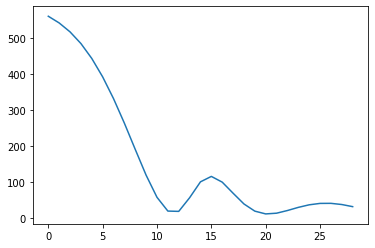

In [22]:
import matplotlib.pyplot as plt
plt.plot(lossLst)
plt.show()